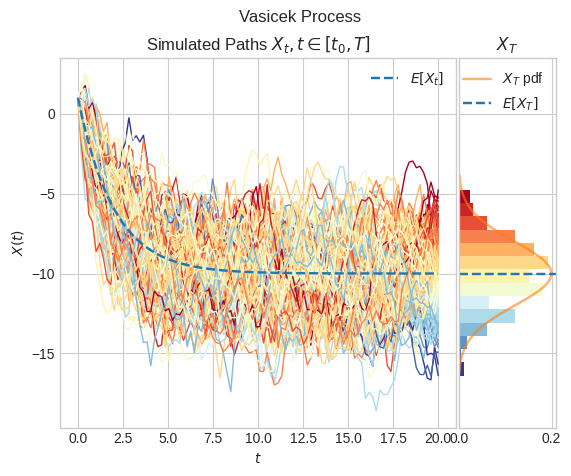

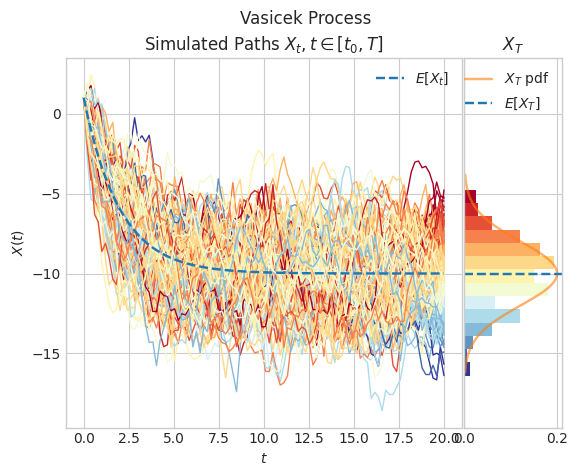

In [9]:
!pip install aleatory
from aleatory.processes import Vasicek
model = Vasicek(theta = 0.5 , mu = -10 , sigma = 2 , initial = 1 , T =20)
model.draw(n = 100 , N = 200)

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import norm
class Vasicek:
  def __init__(self,theta,mu,sigma,initial,T):
    self.theta = theta
    self.mu = mu
    self.sigma = sigma
    self.initial = initial
    self.T = T
  def analytical_mean(self,t):
    return self.mu + (self.initial - self.mu)*np.exp(-self.theta*t)
  def analytical_variance(self,t):
    return self.sigma**2*(1-np.exp(-2*self.theta*t))/(2*self.theta)
  def analytical_std(self,t):
    return np.sqrt(self.analytical_variance(t))
  def analytical_covariance(self,t,s):
    term1 = np.exp(-self.theta * abs(t - s))
    term2 = np.exp(-self.theta * (t + s))
    cov = (self.sigma**2 / (2 * self.theta)) * (term1 - term2)
    return cov
model = Vasicek(theta = 0.5 , mu = -10 , sigma = 2 , initial = 1 , T = 20)
print(mode.analytical_mean(t=1))
print(mode.analytical_variance(t=1))
print(mode.analytical_std(t=1))
print(mode.analytical_covariance(t=1,s=2))

-3.328162743161032
2.5284822353142307
1.5901201952413002
1.5336019982568145


-3.328162743161032
1.5901201952413002
2.5284822353142307


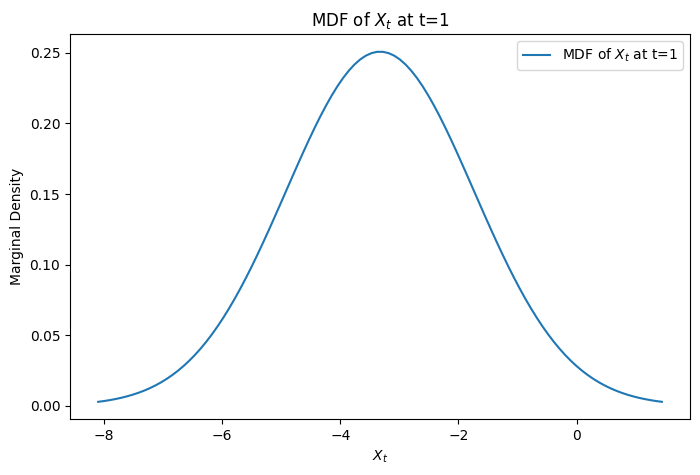

In [13]:
from scipy.stats import norm
import numpy as np
#### Calculate Mean and Varaince of Normal Distribution with initial values of X0,mu,sigma,t
def get_marginal(Vasicek,t):
    mean = Vasicek.analytical_mean(t)
    std = Vasicek.analytical_std(t)
    dis = norm(loc=mean, scale=std)
    X_spaces = np.linspace(mean-3*std, mean+3*std, 100)
    pdf_values = dis.pdf(X_spaces)
    print(mean)
    print(std)
    print(Vasicek.analytical_covariance(t,t))
    plt.figure(figsize=(8,5))
    plt.plot(X_spaces , pdf_values , label=f"MDF of $X_t$ at t={t}" )
    plt.title(f"MDF of $X_t$ at t={t}")
    plt.xlabel("$X_t$")
    plt.ylabel("Marginal Density")
    plt.legend()
    plt.show()
get_marginal(model , 1)


-3.934693402873666
1.5901201952413002
2.5284822353142307


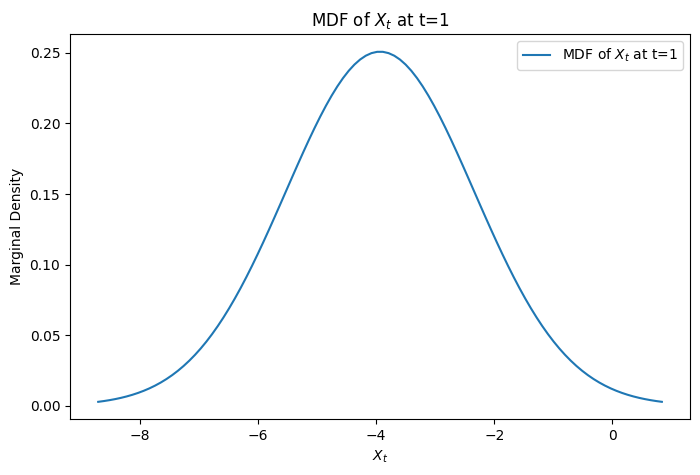

In [6]:
mode = Vasicek(theta = 0.5 , mu = -10 , sigma = 2 , initial = 0 , T = 20)#initial changed to 0
get_marginal(model , 1)

0.21306131942526685
1.5901201952413002
2.5284822353142307


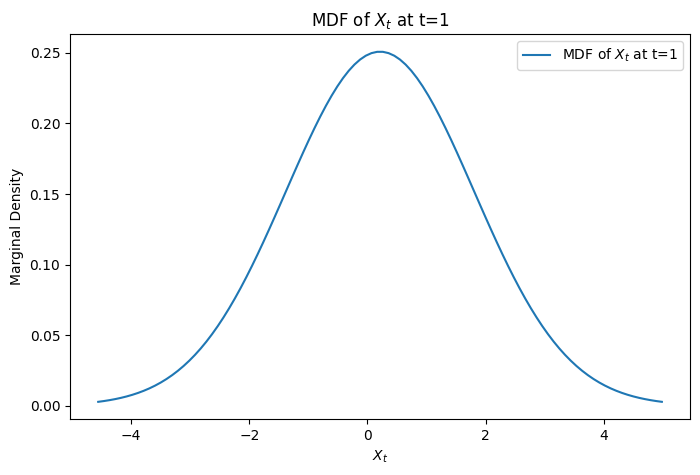

In [14]:
model = Vasicek(theta = 0.5 , mu = -1 , sigma = 2 , initial = 1 , T = 20)#mu changed to -1
get_marginal(model , 1)

-6.321205588285577
1.3150397079657992
1.7293294335267746


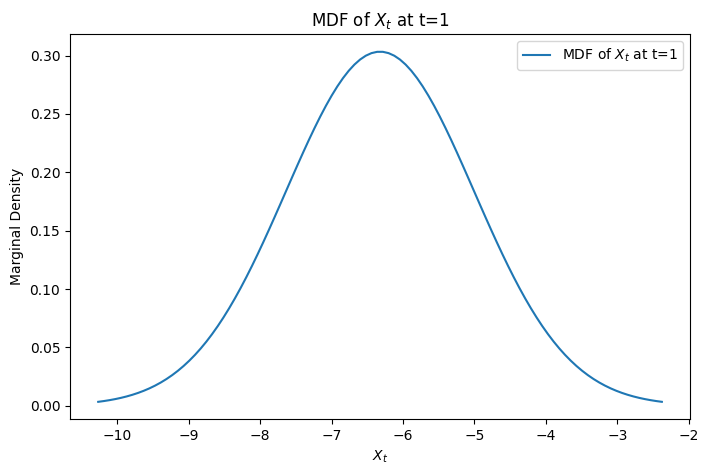

In [15]:
model = Vasicek(theta = 1 , mu = -10 , sigma = 2 , initial = 0 , T = 20)#theta changed to 1
get_marginal(model , 1)

-3.934693402873666
3.1802403904826004
10.113928941256923


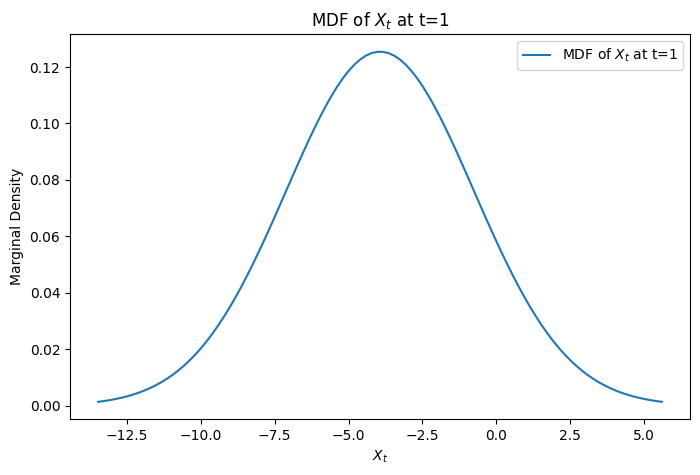

In [16]:
model = Vasicek(theta = 0.5 , mu = -10 , sigma = 4 , initial = 0 , T = 20)#sigma changed to 4
get_marginal(model , 1)

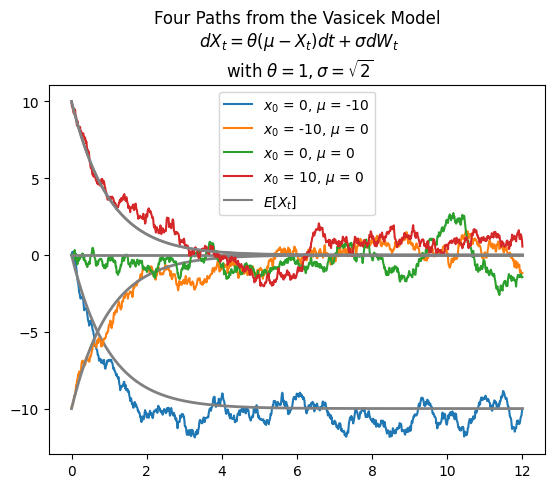

In [18]:
from aleatory.processes import Vasicek
import matplotlib.pyplot as plt
import numpy as np

process = Vasicek(theta=1.0, mu=-10.0, sigma=np.sqrt(2), initial=0.0, T=12.0)
path = process.simulate(n=1000, N=1)
ts = process.times
exp = process.marginal_expectation(ts)
plt.plot(ts, path[0], label= f'$x_0$ = 0, $\mu$ = -10')
plt.plot(ts, exp, color='grey',linewidth=2)

for x0 in [-10.0, 0.0, 10.0]:
    process = Vasicek(theta=1.0, mu=0.0, sigma=np.sqrt(2), initial=x0, T=12.0)
    path = process.simulate(n=1000, N=1)
    plt.plot(ts, path[0], label= f'$x_0$ = {x0:.0f}, $\mu$ = 0')
    exp = process.marginal_expectation(ts)
    plt.plot(ts, exp, color='grey', linewidth=2)
plt.plot(ts, exp, color='grey', label=f'$E[X_t]$')
plt.legend()
plt.title('Four Paths from the Vasicek Model\n $dX_t = \\theta(\mu - X_t) dt + \sigma dW_t$\n with $\\theta = 1, \sigma = \sqrt{2}$')
plt.show()

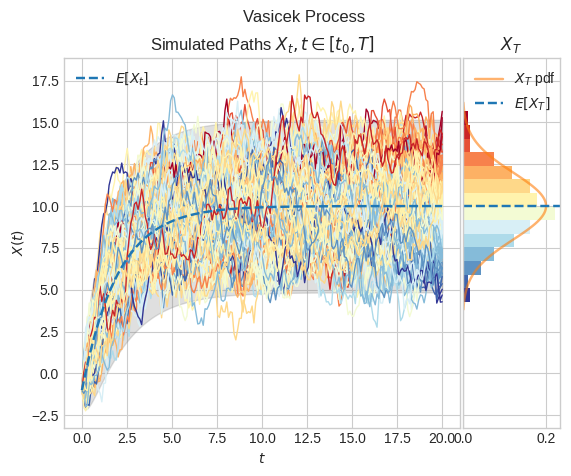

In [19]:
process = Vasicek(theta=0.5, mu=10.0, sigma=2.0, initial=-1.0, T=20.0)
fig = process.draw(n=200, N=200, envelope=True)

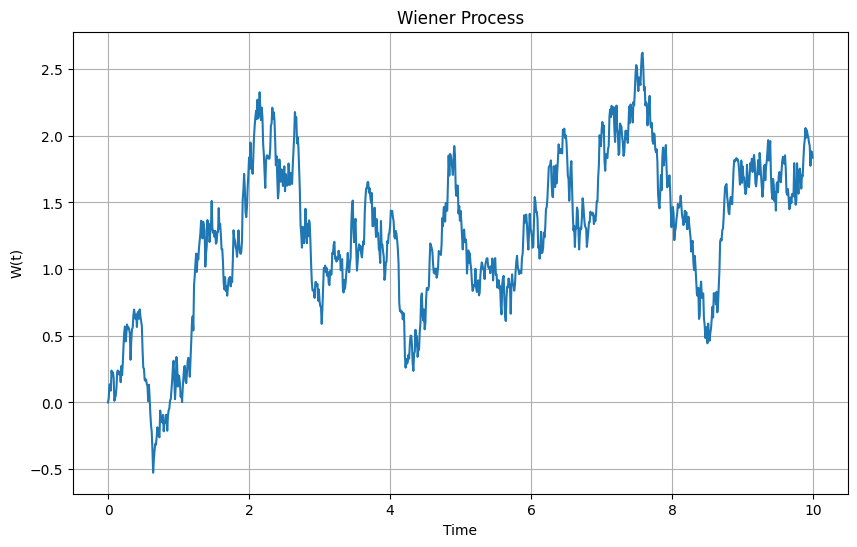

In [20]:
import numpy as np
import matplotlib.pyplot as plt

def simulate_wiener_process(num_points, dt):
    # Generate the increments using normal distribution
    increments = np.random.normal(0, np.sqrt(dt), num_points - 1)

    # The Wiener process starts at zero, so we concatenate a 0 at the beginning
    W = np.concatenate([[0], np.cumsum(increments)])

    return W

# Simulation parameters
num_points = 1000
dt = 0.01

W = simulate_wiener_process(num_points, dt)

# Plotting the Wiener process
plt.figure(figsize=(10, 6))
plt.plot(np.arange(num_points) * dt, W)
plt.title('Wiener Process')
plt.xlabel('Time')
plt.ylabel('W(t)')
plt.grid(True)
plt.show()